In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# 1. Import and warehouse data:

> • Import all the given datasets and explore shape and size of each.

In [2]:
data1=pd.read_csv('C:/Users/shahs/Desktop/Part2 - Data1.csv')

In [3]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [4]:
data2=pd.read_csv('C:/Users/shahs/Desktop/Part2 -Data2.csv')

In [5]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [6]:
data1.shape

(5000, 8)

In [7]:
data2.shape

(5000, 7)

In [8]:
data=data2.merge(data1,right_on='ID',left_on='ID')

In [9]:
data.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,0,1,0,0,0,NaN,25,1,49,91107,4,1.6,1
1,2,0,1,0,0,0,NaN,45,19,34,90089,3,1.5,1
2,3,0,0,0,0,0,NaN,39,15,11,94720,1,1.0,1
3,4,0,0,0,0,0,NaN,35,9,100,94112,1,2.7,2
4,5,0,0,0,0,1,NaN,35,8,45,91330,4,1.0,2


In [10]:
data.shape

(5000, 14)

## 2. Data cleansing:

> • Explore and if required correct the datatypes of each attribute

In [11]:
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    data[i]=data[i].astype('category')

In [12]:
data.dtypes

ID                        int64
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Mortgage             5000 non-null   int64   
 2   Security             5000 non-null   category
 3   FixedDepositAccount  5000 non-null   category
 4   InternetBanking      5000 non-null   category
 5   CreditCard           5000 non-null   category
 6   LoanOnCard           4980 non-null   category
 7   Age                  5000 non-null   int64   
 8   CustomerSince        5000 non-null   int64   
 9   HighestSpend         5000 non-null   int64   
 10  ZipCode              5000 non-null   int64   
 11  HiddenScore          5000 non-null   category
 12  MonthlyAverageSpend  5000 non-null   float64 
 13  Level                5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.4 KB


In [14]:
data.isnull().sum()

ID                      0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
dtype: int64

In [15]:
data.dropna(axis=0,inplace=True)

In [16]:
data.isnull().sum()

ID                     0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
dtype: int64

In [17]:
data.drop('ID',axis=1,inplace=True)

## 3. Data analysis & visualisation:

> • Perform detailed statistical analysis on the data

In [18]:
data.describe()

,Mortgage,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000
mean,56.589759,45.352610,20.117671,73.85241,93152.420482,1.939536
std,101.836758,11.464212,11.468716,46.07009,2123.660073,1.750006
min,0.000000,23.000000,-3.000000,8.00000,9307.000000,0.000000
25%,0.000000,35.000000,10.000000,39.00000,91911.000000,0.700000
50%,0.000000,45.000000,20.000000,64.00000,93407.000000,1.500000
75%,101.000000,55.000000,30.000000,98.00000,94608.000000,2.525000
max,635.000000,67.000000,43.000000,224.00000,96651.000000,10.000000


> Mean is greater than median in higestspend therefore there will be positive skewness and its almost same in mortgage,age. 

> • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

# UNIVARIATE ANALYSIS

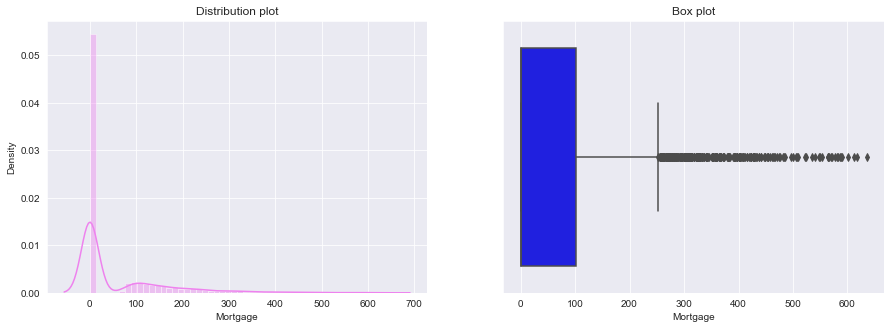

outliers in Mortgage: 291


In [19]:
a, ax= plt.subplots(1, 2, figsize=(15,5))
sns.distplot(data['Mortgage'],  ax=ax[0],color='violet')
sns.boxplot(x = 'Mortgage', data=data,  orient='h' , ax=ax[1],color='blue')
ax[0].set_title('Distribution plot')
ax[1].set_title('Box plot')
plt.show()
q3=np.percentile(data['Mortgage'],75)
q1=np.percentile(data['Mortgage'],25)
IQR=q3-q1
threshold=IQR*1.5
upper=q3+threshold
lower=q1-threshold
Outliers=[i for i in data['Mortgage'] 
          if i < lower or i > upper]
print('outliers in Mortgage:',len(Outliers))

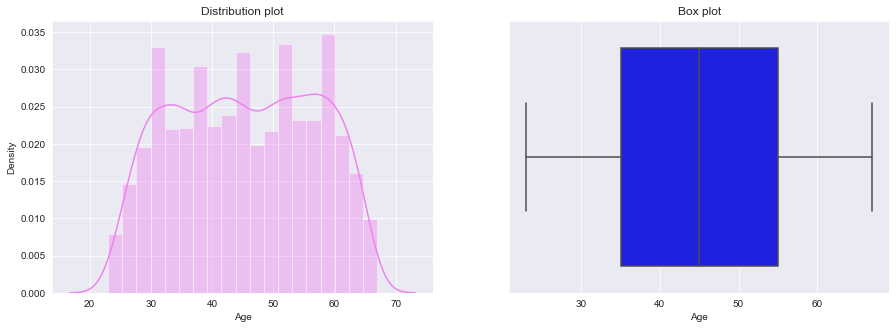

outliers in Age: 0


In [20]:
b, ax= plt.subplots(1, 2, figsize=(15,5))
sns.distplot(data['Age'],  ax=ax[0],color='violet')
sns.boxplot(x = 'Age', data=data,  orient='h' , ax=ax[1],color='blue')
ax[0].set_title('Distribution plot')
ax[1].set_title('Box plot')
plt.show()
q3=np.percentile(data['Age'],75)
q1=np.percentile(data['Age'],25)
IQR=q3-q1
threshold=IQR*1.5
upper=q3+threshold
lower=q1-threshold
Outliers=[i for i in data['Age'] 
          if i < lower or i > upper]
print('outliers in Age:',len(Outliers))

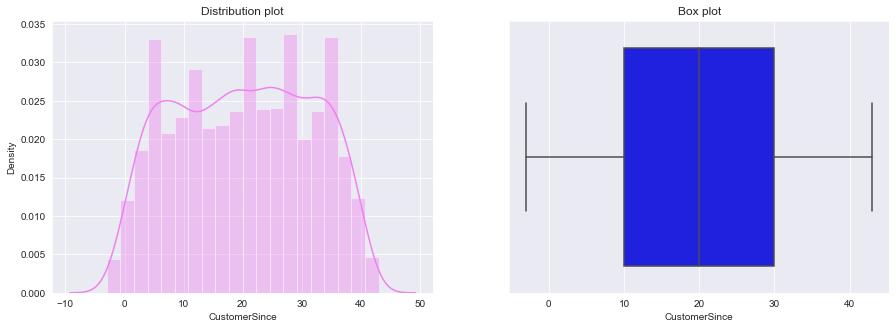

outliers in CustomerSince: 0


In [21]:
c, ax= plt.subplots(1, 2, figsize=(15,5))
sns.distplot(data['CustomerSince'],  ax=ax[0],color='violet')
sns.boxplot(x = 'CustomerSince', data=data,  orient='h' , ax=ax[1],color='blue')
ax[0].set_title('Distribution plot')
ax[1].set_title('Box plot')
plt.show()
q3=np.percentile(data['CustomerSince'],75)
q1=np.percentile(data['CustomerSince'],25)
IQR=q3-q1
threshold=IQR*1.5
upper=q3+threshold
lower=q1-threshold
Outliers=[i for i in data['CustomerSince'] 
          if i < lower or i > upper]
print('outliers in CustomerSince:',len(Outliers))

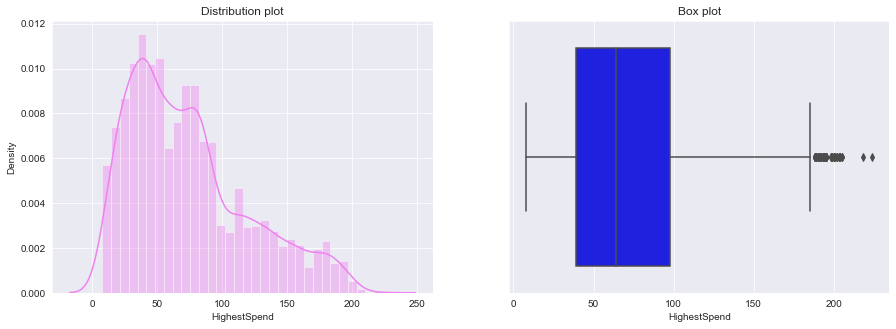

outliers in HighestSpend: 96


In [22]:
d, ax= plt.subplots(1, 2, figsize=(15,5))
sns.distplot(data['HighestSpend'],  ax=ax[0],color='violet')
sns.boxplot(x = 'HighestSpend', data=data,  orient='h' , ax=ax[1],color='blue')
ax[0].set_title('Distribution plot')
ax[1].set_title('Box plot')
plt.show()
q3=np.percentile(data['HighestSpend'],75)
q1=np.percentile(data['HighestSpend'],25)
IQR=q3-q1
threshold=IQR*1.5
upper=q3+threshold
lower=q1-threshold
Outliers=[i for i in data['HighestSpend'] 
          if i < lower or i > upper]
print('outliers in HighestSpend:',len(Outliers))

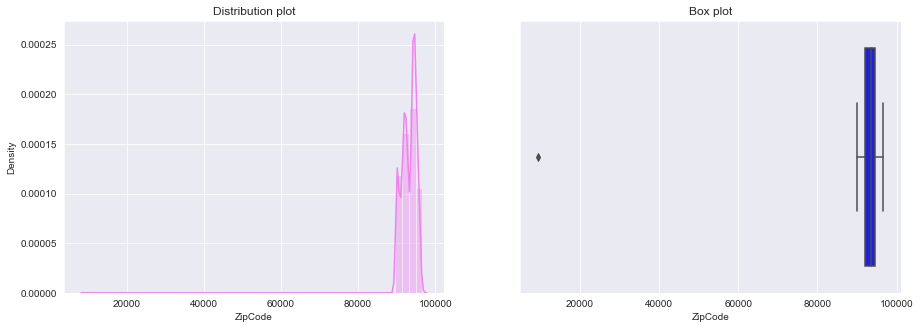

outliers in ZipCode: 1


In [23]:
e, ax= plt.subplots(1, 2, figsize=(15,5))
sns.distplot(data['ZipCode'],  ax=ax[0],color='violet')
sns.boxplot(x = 'ZipCode', data=data,  orient='h' , ax=ax[1],color='blue')
ax[0].set_title('Distribution plot')
ax[1].set_title('Box plot')
plt.show()
q3=np.percentile(data['ZipCode'],75)
q1=np.percentile(data['ZipCode'],25)
IQR=q3-q1
threshold=IQR*1.5
upper=q3+threshold
lower=q1-threshold
Outliers=[i for i in data['ZipCode'] 
          if i < lower or i > upper]
print('outliers in ZipCode:',len(Outliers))

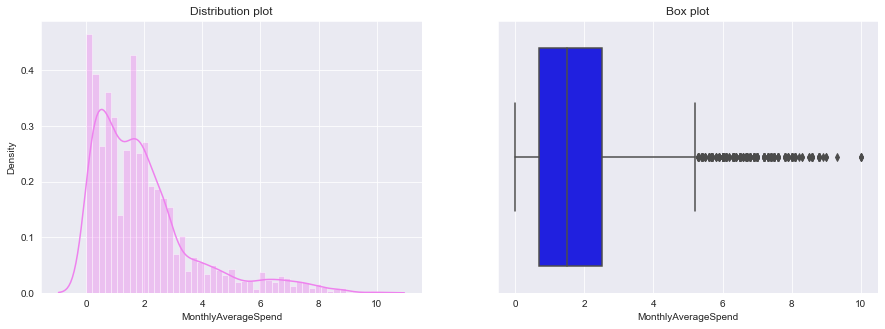

outliers in MonthlyAverageSpend: 324


In [24]:
f, ax= plt.subplots(1, 2, figsize=(15,5))
sns.distplot(data['MonthlyAverageSpend'],  ax=ax[0],color='violet')
sns.boxplot(x = 'MonthlyAverageSpend', data=data,  orient='h' , ax=ax[1],color='blue')
ax[0].set_title('Distribution plot')
ax[1].set_title('Box plot')
plt.show()
q3=np.percentile(data['MonthlyAverageSpend'],75)
q1=np.percentile(data['MonthlyAverageSpend'],25)
IQR=q3-q1
threshold=IQR*1.5
upper=q3+threshold
lower=q1-threshold
Outliers=[i for i in data['MonthlyAverageSpend'] 
          if i < lower or i > upper]
print('outliers in MonthlyAverageSpend:',len(Outliers))

> Categorical distribudtion

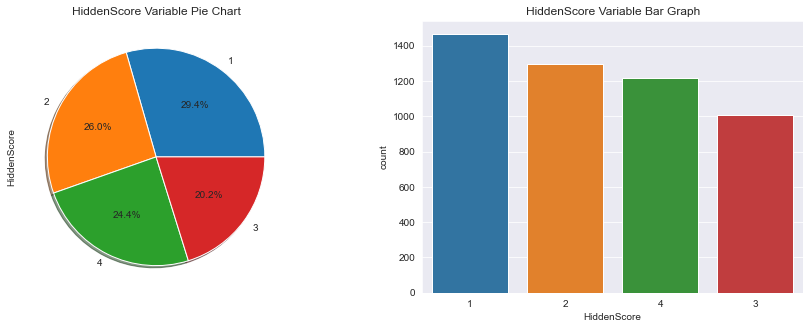

In [25]:
g,axes=plt.subplots(1,2,figsize=(15,5))
data['HiddenScore'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('HiddenScore',data=data,ax=axes[1],order=[1,2,4,3])
axes[0].set_title('HiddenScore Variable Pie Chart')
axes[1].set_title('HiddenScore Variable Bar Graph')
plt.show()

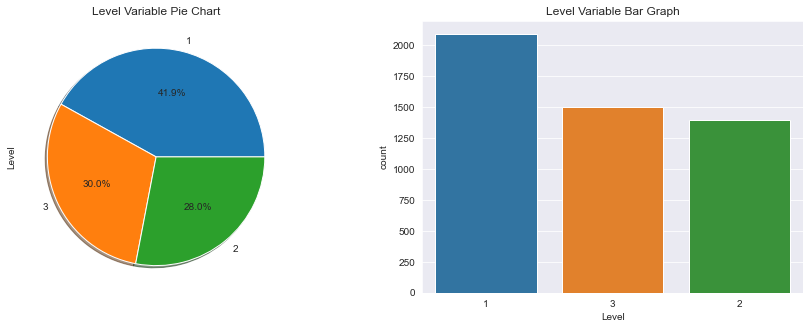

In [26]:
h,axes=plt.subplots(1,2,figsize=(15,5))
data['Level'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Level',data=data,ax=axes[1],order=[1,3,2])
axes[0].set_title('Level Variable Pie Chart')
axes[1].set_title('Level Variable Bar Graph')
plt.show()

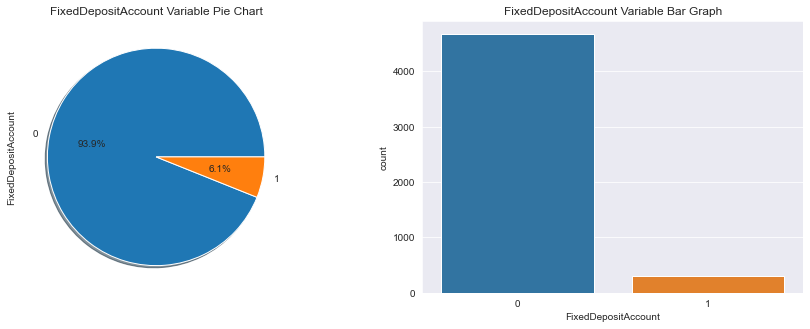

In [27]:
i,axes=plt.subplots(1,2,figsize=(15,5))
data['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('FixedDepositAccount',data=data,ax=axes[1])
axes[0].set_title('FixedDepositAccount Variable Pie Chart')
axes[1].set_title('FixedDepositAccount Variable Bar Graph')
plt.show()

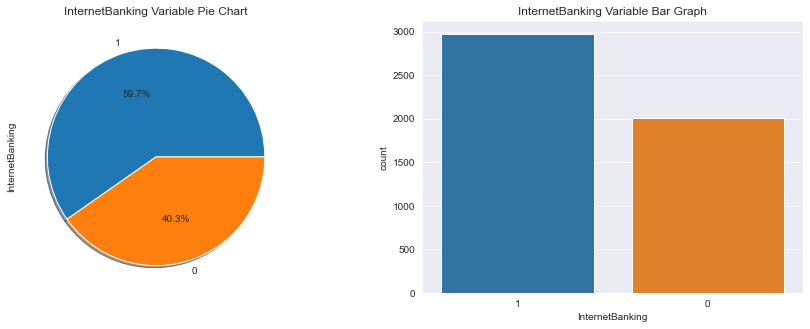

In [28]:
j,axes=plt.subplots(1,2,figsize=(15,5))
data['InternetBanking'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('InternetBanking',data=data,ax=axes[1],order=[1,0])
axes[0].set_title('InternetBanking Variable Pie Chart')
axes[1].set_title('InternetBanking Variable Bar Graph')
plt.show()

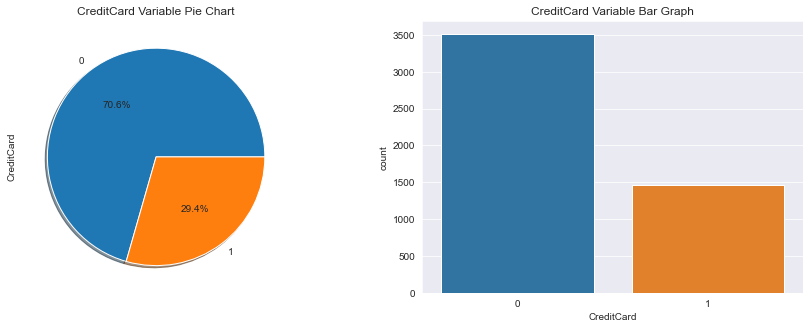

In [29]:
k,axes=plt.subplots(1,2,figsize=(15,5))
data['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('CreditCard',data=data,ax=axes[1],order=[0,1])
axes[0].set_title('CreditCard Variable Pie Chart')
axes[1].set_title('CreditCard Variable Bar Graph')
plt.show()

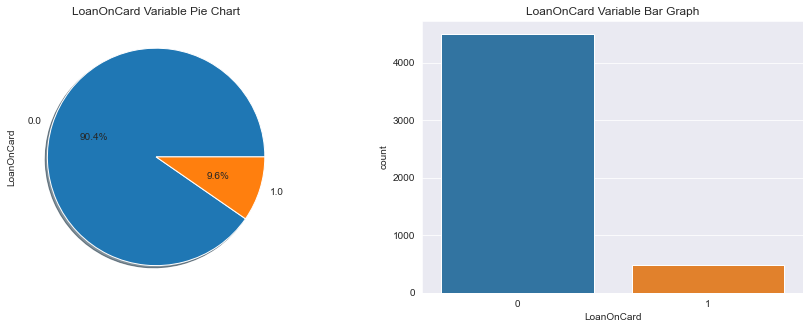

In [30]:
l,axes=plt.subplots(1,2,figsize=(15,5))
data['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=data,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

# Bi VARIATE ANALYSIS

<AxesSubplot:xlabel='LoanOnCard', ylabel='CustomerSince'>

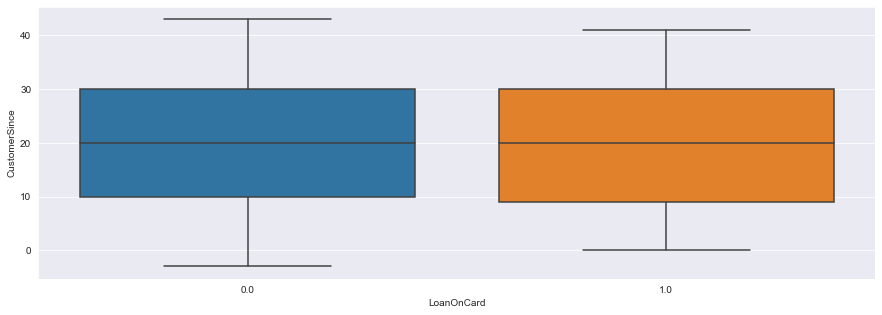

In [31]:
# CustomerSince
plt.figure(figsize=(15,5))
sns.boxplot(x='LoanOnCard', y='CustomerSince', data= data)

<AxesSubplot:xlabel='LoanOnCard', ylabel='HighestSpend'>

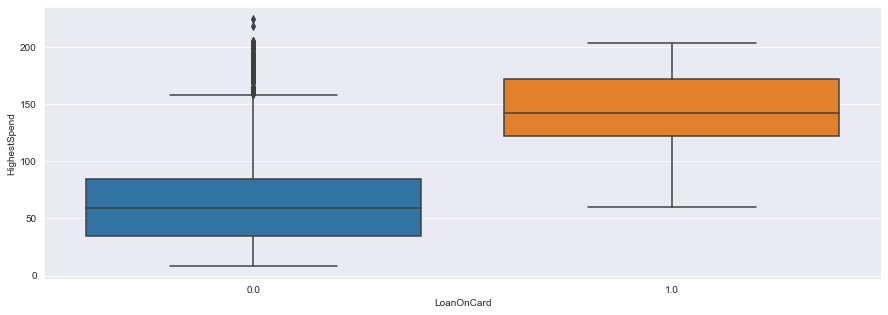

In [32]:
# HighestSpend
plt.figure(figsize=(15,5))
sns.boxplot(x='LoanOnCard', y='HighestSpend', data= data)

<AxesSubplot:xlabel='LoanOnCard', ylabel='MonthlyAverageSpend'>

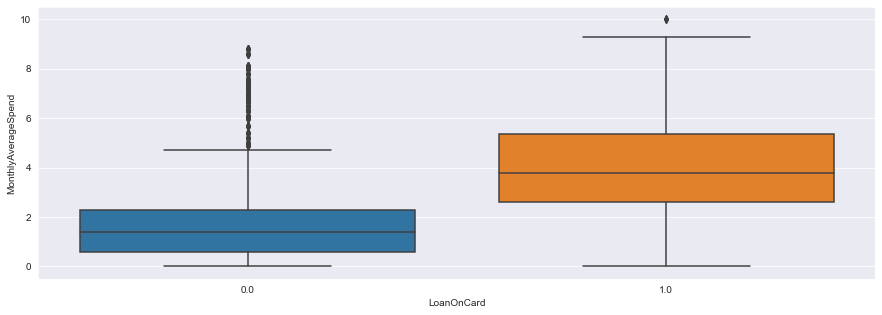

In [33]:
# MonthlyAverageSpend
plt.figure(figsize=(15,5))
sns.boxplot(x='LoanOnCard', y='MonthlyAverageSpend', data= data)

<AxesSubplot:xlabel='LoanOnCard', ylabel='Mortgage'>

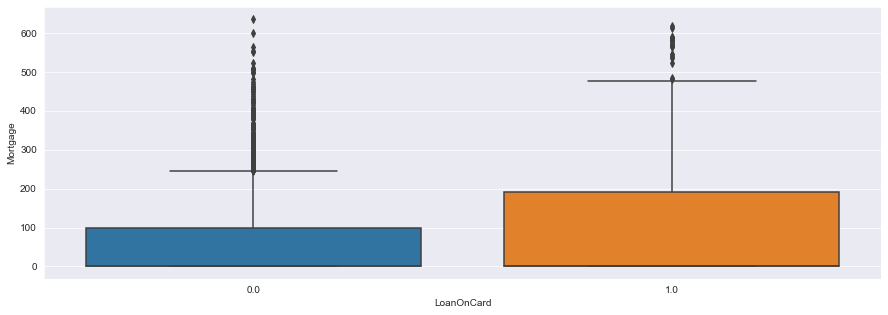

In [34]:
# Mortgage
plt.figure(figsize=(15,5))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= data)

<AxesSubplot:xlabel='LoanOnCard', ylabel='Age'>

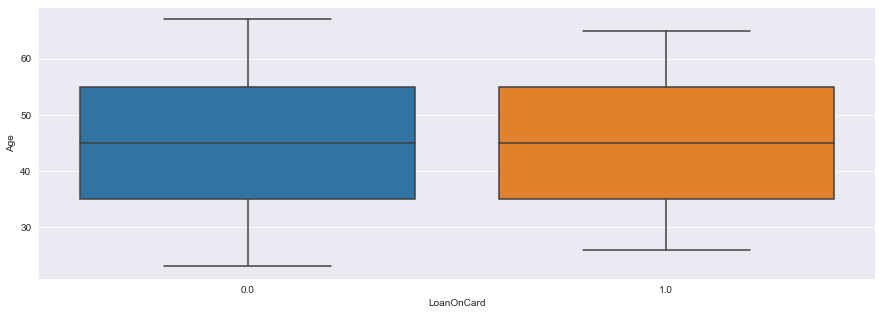

In [35]:
# Age
plt.figure(figsize=(15,5))
sns.boxplot(x='LoanOnCard', y='Age', data= data)

<AxesSubplot:xlabel='HiddenScore', ylabel='count'>

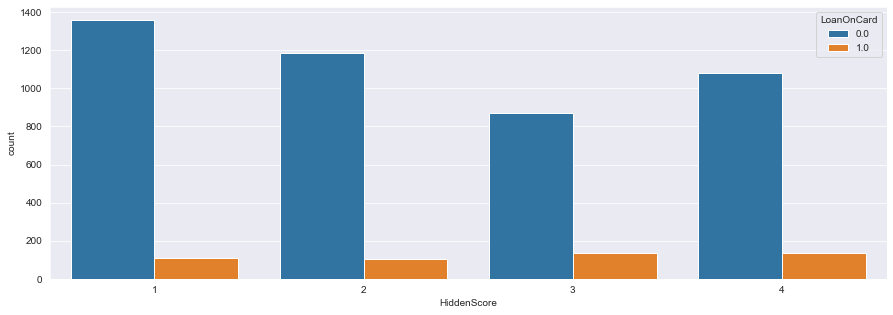

In [36]:
# HiddenScore
plt.figure(figsize=(15,5))
sns.countplot(data['HiddenScore'],hue=data['LoanOnCard'])

<AxesSubplot:xlabel='Level', ylabel='count'>

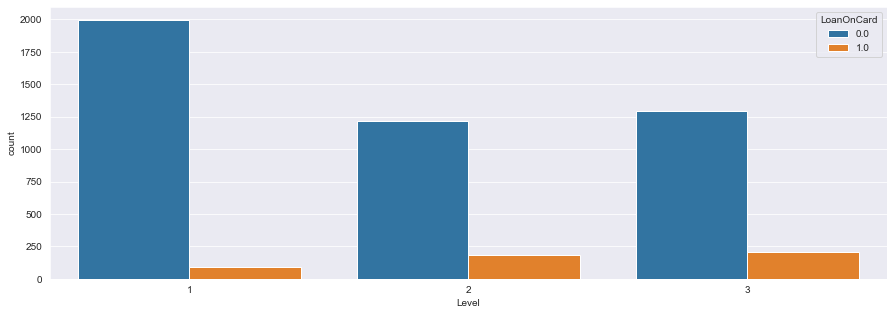

In [37]:
# Level
plt.figure(figsize=(15,5))
sns.countplot(data['Level'],hue=data['LoanOnCard'])

<AxesSubplot:xlabel='Security', ylabel='count'>

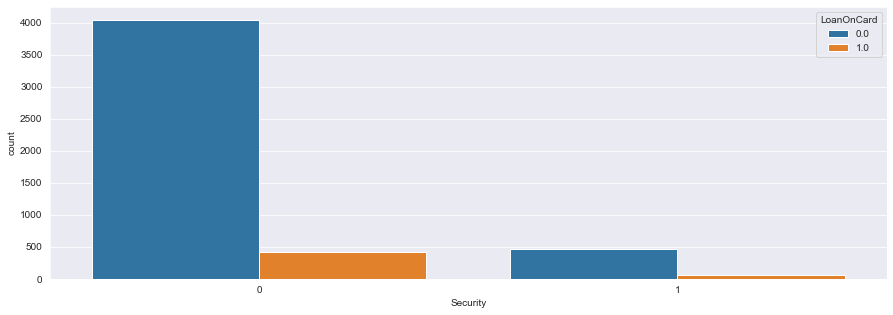

In [38]:
# Security
plt.figure(figsize=(15,5))
sns.countplot(data['Security'],hue=data['LoanOnCard'])

<AxesSubplot:xlabel='FixedDepositAccount', ylabel='count'>

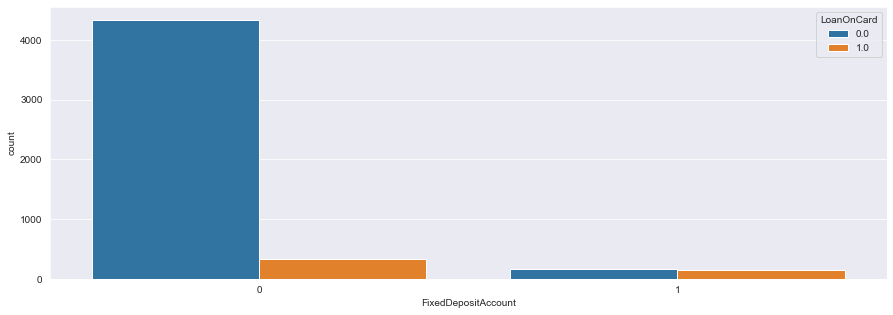

In [39]:
# FixedDepositAccount
plt.figure(figsize=(15,5))
sns.countplot(data['FixedDepositAccount'],hue=data['LoanOnCard'])

# MULTIVARIATE ANALYSIS

<AxesSubplot:xlabel='Level', ylabel='MonthlyAverageSpend'>

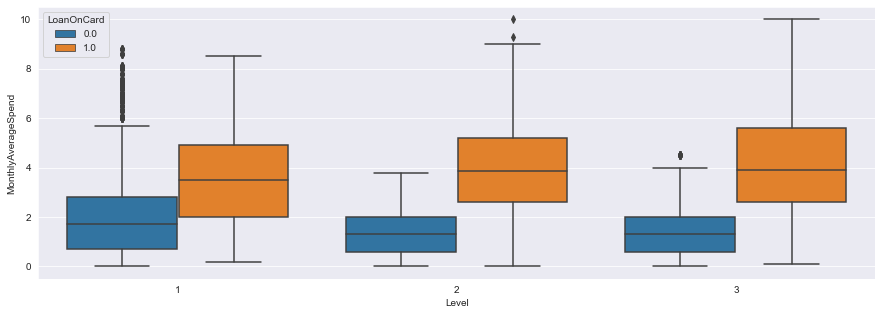

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Level", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=data)

<AxesSubplot:xlabel='InternetBanking', ylabel='MonthlyAverageSpend'>

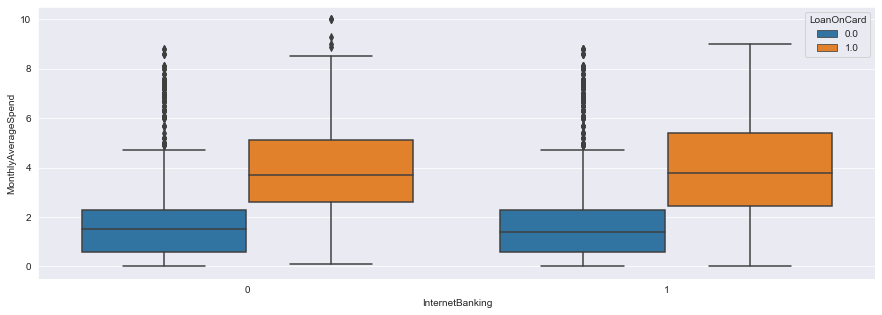

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(x="InternetBanking", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=data)

<AxesSubplot:xlabel='CreditCard', ylabel='MonthlyAverageSpend'>

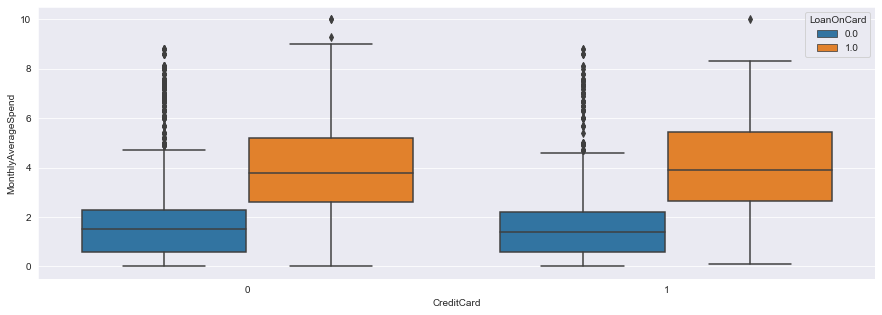

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(x="CreditCard", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=data)

<AxesSubplot:xlabel='FixedDepositAccount', ylabel='MonthlyAverageSpend'>

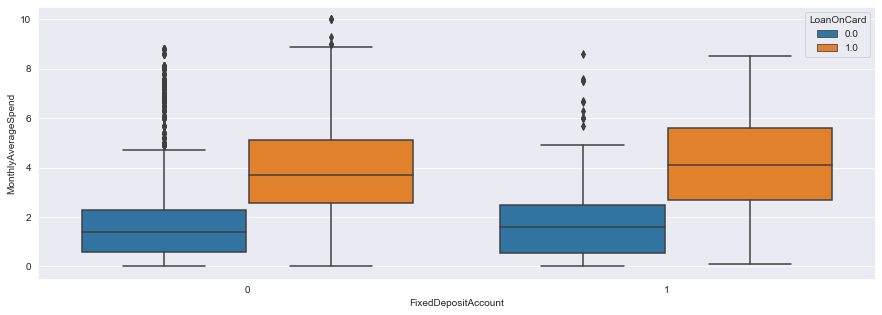

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(x="FixedDepositAccount", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=data)

# 4. Data pre-processing:

> • Segregate predictors vs target attributes

In [44]:
col=['HighestSpend','MonthlyAverageSpend','Mortgage']
for c in col:
    q25,q75=np.percentile(data[c],25),np.percentile(data[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in data[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    data_include = data.loc[(data[c] >= lower) & (data[c] <= upper)]
    mean=int(data_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    data[c]=np.where(data[c]>upper,mean,data[c])
    data[c]=np.where(data[c]<lower,mean,data[c])
    Outliers=[i for i in data[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




> • Check for target balancing and fix it if found imbalanced.

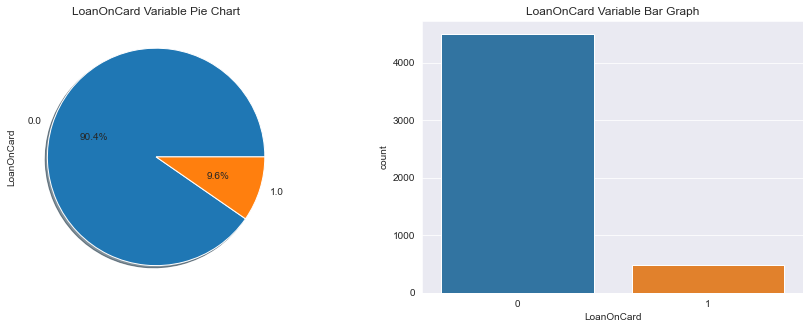

In [45]:
x,axes=plt.subplots(1,2,figsize=(15,5))
data['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=data,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

> • Perform train-test split

In [46]:
X=data.drop(columns='LoanOnCard')
y=data['LoanOnCard']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# 5. Model training, testing and tuning:

> • Design and train a Logistic regression and Naive Bayes classifiers

> • Display the classification accuracies for train and test data.

> • Display and explain the classification report in detail.

> • Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with
your comments for selecting this model. 

In [47]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9076305220883534
Accuracy on Test data: 0.9049531459170014


<AxesSubplot:>

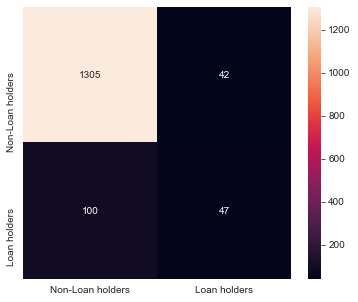

In [48]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])
data_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (6,5))
sns.heatmap(data_cm, annot=True ,fmt='g')

In [49]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1347
         1.0       0.53      0.32      0.40       147

    accuracy                           0.90      1494
   macro avg       0.73      0.64      0.67      1494
weighted avg       0.89      0.90      0.89      1494



In [50]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X,y)

In [51]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [52]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
1.0    4500
0.0    4500
Name: LoanOnCard, dtype: int64


In [53]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()

LR: 0.910241 (0.010319)
KNN: 0.902811 (0.012706)
NB: 0.906426 (0.014707)


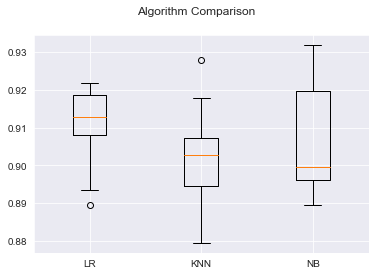

In [54]:
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))


results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.918273 (0.018987)
KNN: 0.903012 (0.005823)
NB: 0.906627 (0.015033)


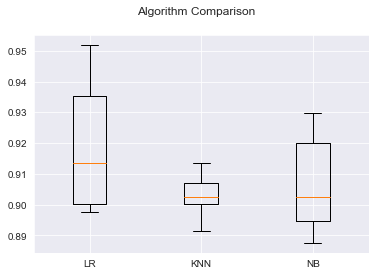

In [55]:
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))


results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6. Conclusion and improvisation:

> • Write your conclusion on the results.

> • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the
bank to perform a better data analysis in future

In [56]:
#Logistic regression is the best modeel for traing and testing purpose.
#There are some customers who have taken loancard and they dont have any credit cards this type of improvement can be done so that error can be reduced
#Data can be collected equally for better performance